In [1]:
import os 

path = "/home/verlo/dev_ws/DeepLearning/data/dogs-vs-cats/train/"
os.listdir(path)

['dog.1371.jpg',
 'cat.10203.jpg',
 'cat.6734.jpg',
 'cat.7066.jpg',
 'dog.12103.jpg',
 'dog.8870.jpg',
 'cat.384.jpg',
 'cat.5089.jpg',
 'dog.10020.jpg',
 'cat.11736.jpg',
 'dog.12227.jpg',
 'cat.1873.jpg',
 'dog.8185.jpg',
 'dog.9716.jpg',
 'cat.3220.jpg',
 'cat.4387.jpg',
 'dog.1414.jpg',
 'dog.9800.jpg',
 'cat.10099.jpg',
 'cat.2626.jpg',
 'cat.6933.jpg',
 'cat.4272.jpg',
 'cat.10935.jpg',
 'dog.568.jpg',
 'dog.6633.jpg',
 'cat.4075.jpg',
 'dog.3962.jpg',
 'dog.6489.jpg',
 'dog.7822.jpg',
 'dog.4861.jpg',
 'cat.588.jpg',
 'cat.7728.jpg',
 'cat.9202.jpg',
 'cat.3302.jpg',
 'cat.3202.jpg',
 'dog.1250.jpg',
 'dog.3529.jpg',
 'dog.8169.jpg',
 'dog.3542.jpg',
 'cat.3733.jpg',
 'dog.12450.jpg',
 'dog.3043.jpg',
 'cat.7500.jpg',
 'cat.2950.jpg',
 'dog.8364.jpg',
 'cat.4771.jpg',
 'cat.731.jpg',
 'cat.4637.jpg',
 'dog.1297.jpg',
 'dog.1365.jpg',
 'dog.9655.jpg',
 'cat.206.jpg',
 'dog.8192.jpg',
 'dog.968.jpg',
 'dog.10801.jpg',
 'dog.612.jpg',
 'dog.2583.jpg',
 'cat.3153.jpg',
 'cat.4298.j

In [2]:
full_names = os.listdir(path)
full_names = full_names[:5000]
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

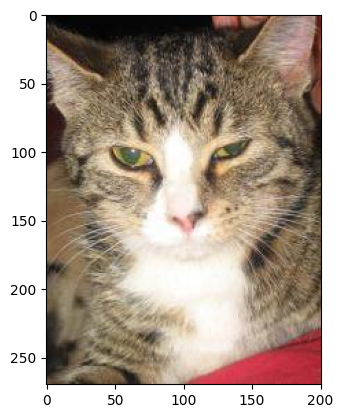

In [3]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [4]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(500, 368, 3)

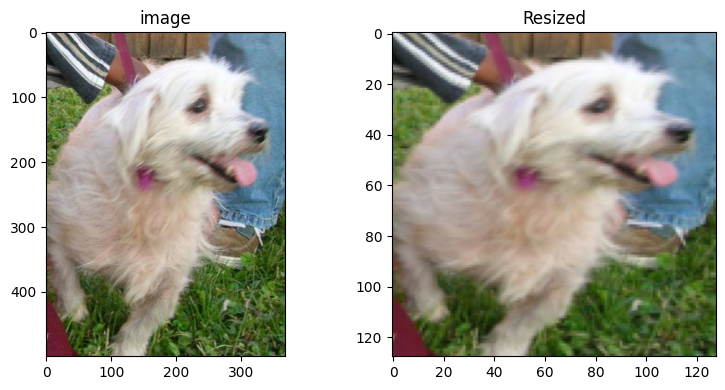

In [5]:
from skimage.transform import resize
resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [6]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (128, 128, 3)))

images = np.array(images)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [7]:
images.shape, labels[:3]

((5000, 128, 128, 3), ['dog', 'cat', 'cat'])

In [8]:
images[:3]

array([[[[0.43059819, 0.42667662, 0.44662027],
         [0.30385107, 0.29995125, 0.31973283],
         [0.2350194 , 0.23286089, 0.24717969],
         ...,
         [0.48249744, 0.34868417, 0.24323332],
         [0.49078998, 0.35725439, 0.25089467],
         [0.51353148, 0.37937564, 0.27331363]],

        [[0.56765359, 0.56373202, 0.58788398],
         [0.41273133, 0.40880978, 0.43180337],
         [0.30720043, 0.30331462, 0.32326454],
         ...,
         [0.50126333, 0.38971548, 0.3125092 ],
         [0.49637072, 0.3840466 , 0.29870078],
         [0.49758496, 0.38222932, 0.29714979]],

        [[0.57903285, 0.57511129, 0.60610113],
         [0.58823642, 0.58431485, 0.60814384],
         [0.3859392 , 0.38201764, 0.40528868],
         ...,
         [0.48540081, 0.38395839, 0.32417675],
         [0.5004562 , 0.39357103, 0.32768862],
         [0.4724111 , 0.35884084, 0.28870042]],

        ...,

        [[0.43820836, 0.71014441, 0.99944571],
         [0.45856542, 0.72422689, 0.99221135]

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 0, 0]), array(['cat', 'dog'], dtype='<U3'))

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((4000, 128, 128, 3), (1000, 128, 128, 3))

0 2847


IndexError: index 2847 is out of bounds for axis 0 with size 2500

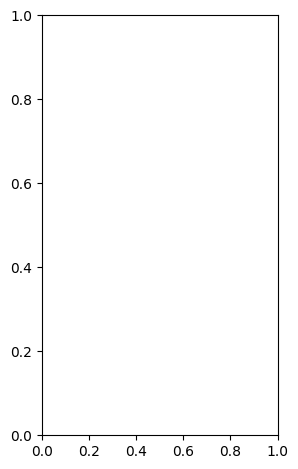

In [19]:
samples = random.choices(population=range(0, 4000), k=8)

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    print(idx,n)
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

model.summary()

/home/verlo/venv/Tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 31, 31, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     7,373,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,430,658 (28.35 MB)

 Trainable params: 7,430,658 (28.35 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
import time

start_time = time.time()

print("X_train samples:", X_train.shape[0])
print("y_train samples:", y_train.shape[0])
print("y_test samples:", y_test.shape[0])

hist = model.fit(X_train.reshape(4000,128,128,3), y_train, epochs=5, verbose=1, validation_data = (X_train.reshape(4000,128,128,3), y_test))
print("fit time : ", time.time() - start_time)

X_train samples: 4500
y_train samples: 4500
y_test samples: 500


ValueError: cannot reshape array of size 221184000 into shape (4000,128,128,3)